In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("data/tatamotors.csv")

In [65]:
sequence_length = 12

In [66]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [67]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

In [68]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [69]:
X, y = create_sequences(scaled_data, sequence_length)

In [70]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [112]:
model = Sequential([
    LSTM(75, activation='selu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(len(features))
])

In [113]:
model.compile(optimizer='adam', loss='mse')

In [114]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 2s 61ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2/50
9/9 [==============================] - 0s 39ms/step - loss: 0.0024 - val_loss: 0.0122
Epoch 3/50
9/9 [==============================] - 0s 42ms/step - loss: 0.0015 - val_loss: 0.0110
Epoch 4/50
9/9 [==============================] - 0s 42ms/step - loss: 0.0010 - val_loss: 0.0098
Epoch 5/50
9/9 [==============================] - 0s 43ms/step - loss: 8.7465e-04 - val_loss: 0.0121
Epoch 6/50
9/9 [==============================] - 0s 46ms/step - loss: 7.6743e-04 - val_loss: 0.0148
Epoch 7/50
9/9 [==============================] - 0s 40ms/step - loss: 6.9913e-04 - val_loss: 0.0136
Epoch 8/50
9/9 [==============================] - 0s 42ms/step - loss: 6.7178e-04 - val_loss: 0.0127
Epoch 9/50
9/9 [==============================] - 0s 46ms/step - loss: 6.2763e-04 - val_loss: 0.0127
Epoch 10/50
9/9 [==============================] - 0s 44ms/step - loss: 6.1594e-04 - val_loss: 0.0163
Epoch

In [115]:
forecast = []
current_batch = X_test[-1].reshape((1, sequence_length, len(features)))

In [116]:
for i in range(len(y_test)):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [117]:
forecast = scaler.inverse_transform(forecast)
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(forecast)+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast, columns=features)
forecast_df['Date'] = forecast_dates

/tmp/ipykernel_4072/1701601951.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(forecast)+1, freq='M')[1:]


In [121]:
print(forecast_df[['Date', 'Close']])
for index, row in forecast_df.iterrows():
    print(f"Date: {row['Date']}, Forecasted Close Price: {row['Close']}")

         Date        Close
0  2024-03-31   799.211930
1  2024-04-30   811.330616
2  2024-05-31   834.571897
3  2024-06-30   861.714637
4  2024-07-31   890.618215
..        ...          ...
72 2030-03-31  2119.085399
73 2030-04-30  2124.794527
74 2030-05-31  2130.291177
75 2030-06-30  2135.583070
76 2030-07-31  2140.671089

[77 rows x 2 columns]
Date: 2024-03-31 00:00:00, Forecasted Close Price: 799.2119295489257
Date: 2024-04-30 00:00:00, Forecasted Close Price: 811.3306158037221
Date: 2024-05-31 00:00:00, Forecasted Close Price: 834.5718971500403
Date: 2024-06-30 00:00:00, Forecasted Close Price: 861.7146366803905
Date: 2024-07-31 00:00:00, Forecasted Close Price: 890.6182147373802
Date: 2024-08-31 00:00:00, Forecasted Close Price: 919.8670433531768
Date: 2024-09-30 00:00:00, Forecasted Close Price: 949.1497957736811
Date: 2024-10-31 00:00:00, Forecasted Close Price: 980.4700174210033
Date: 2024-11-30 00:00:00, Forecasted Close Price: 1012.8224053019724
Date: 2024-12-31 00:00:00, Fore

/tmp/ipykernel_4072/3439705191.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_extended = pd.date_range(start=data['Date'].iloc[-1], periods=78, freq='M')[1:]


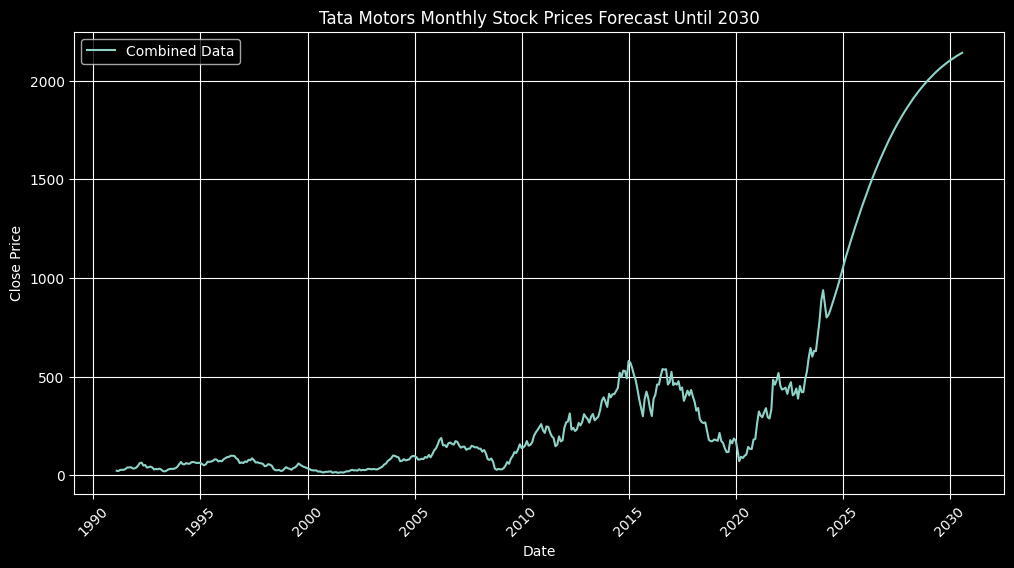

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extend the forecast dates until 2030
forecast_dates_extended = pd.date_range(start=data['Date'].iloc[-1], periods=78, freq='M')[1:]

# Create a dataframe for extended forecast
forecast_df_extended = pd.DataFrame(forecast, columns=features)
forecast_df_extended['Date'] = forecast_dates_extended

# Concatenate original data and extended forecast data
combined_data = pd.concat([data, forecast_df_extended])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=combined_data, label='Combined Data')
plt.title('Tata Motors Monthly Stock Prices Forecast Until 2030')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

